# Figure 13

Below is the code used to produce Figure 13 from our paper.

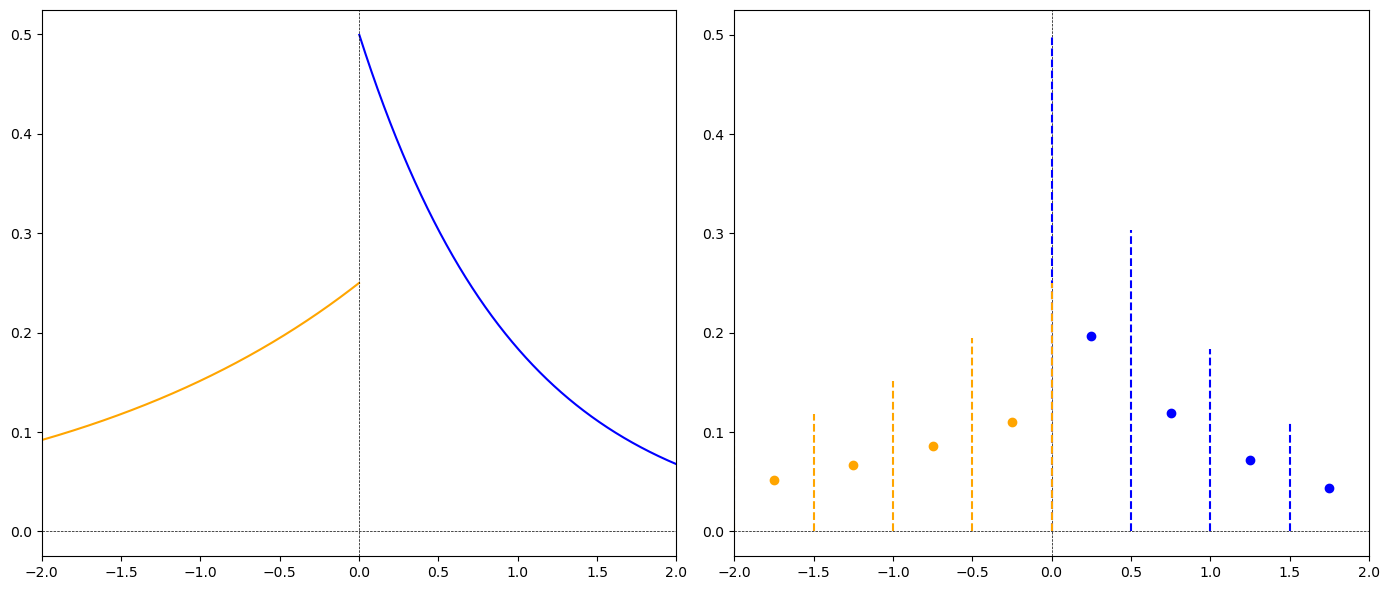

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Mixture density function Alice
def mixture_density_Alice(x, p, lambda_A, lambda_B):
    return (1 - p) * (lambda_A * np.exp(lambda_A * x))

# Mixture density function Bob
def mixture_density_Bob(x, p, lambda_A, lambda_B):
    return p * (lambda_B * np.exp(-lambda_B * x))

# Cumulative probability between two points
def I_mix(x, y, p, lambda_A, lambda_B):
    if x >= 0:
        return p * (np.exp(-lambda_B * x) - np.exp(-lambda_B * y))
    elif y <= 0:
        return (1 - p) * (np.exp(lambda_A * y) - np.exp(lambda_A * x))
    else:
        return 1 - (1 - p) * np.exp(lambda_A * x) - p * np.exp(-lambda_B * y)

# Parameters
p = 1/2
lambda_A = 1/2
lambda_B = 1

# Generate x values for the continuous plot, limited to -2 to 2
x_values_Alice_cts = np.linspace(-2, -0.001, 500)
x_values_Bob_cts = np.linspace(0.001, 2, 2500)
y_values_Alice_cts = [mixture_density_Alice(x, p, lambda_A, lambda_B) for x in x_values_Alice_cts]
y_values_Bob_cts = [mixture_density_Bob(x, p, lambda_A, lambda_B) for x in x_values_Bob_cts]

# Generate x values for the discrete I_mix plot
x_values_Alice_discrete = np.arange(-1.75, 0, 0.5)  # Starts from -1.75 to -0.25 in steps of 0.5
x_values_Bob_discrete = np.arange(0.25, 2, 0.5)   # Starts from 0.25 to 1.75 in steps of 0.5
y_values_Alice_discrete = [I_mix(x - 0.25, x + 0.25, p, lambda_A, lambda_B) for x in x_values_Alice_discrete]
y_values_Bob_discrete = [I_mix(x - 0.25, x + 0.25, p, lambda_A, lambda_B) for x in x_values_Bob_discrete]

# x values where we want dashed vertical lines
dashed_lines_x_Alice = np.arange(-2, 0.5, 0.5)
dashed_lines_x_Bob = np.arange(0, 2, 0.5)
dashed_lines_y_Alice = [mixture_density_Alice(x, p, lambda_A, lambda_B) for x in dashed_lines_x_Alice]
dashed_lines_y_Bob = [mixture_density_Bob(x, p, lambda_A, lambda_B) for x in dashed_lines_x_Bob]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the mixture density function
ax1.plot(x_values_Alice_cts, y_values_Alice_cts, color="orange")
ax1.plot(x_values_Bob_cts, y_values_Bob_cts, color="blue")
ax1.set_xlim(-2, 2)
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax1.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Plot the discretized approximation
ax2.scatter(x_values_Alice_discrete, y_values_Alice_discrete, color="orange")
ax2.scatter(x_values_Bob_discrete, y_values_Bob_discrete, color="blue")
ax2.set_xlim(-2, 2)
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax2.axvline(0, color='black', linewidth=0.5, linestyle='--')


# Add dashed vertical lines for Bob
for x, y in zip(dashed_lines_x_Bob, dashed_lines_y_Bob):
    ax2.plot([x, x], [0, y], linestyle="--", color="blue")

# Add dashed vertical lines for Alice
for x, y in zip(dashed_lines_x_Alice, dashed_lines_y_Alice):
    ax2.plot([x, x], [0, y], linestyle="--", color="orange")

plt.tight_layout()
plt.savefig('discretization.pdf')